<a href="https://colab.research.google.com/github/Pedro-Boechat/trainee/blob/main/Periodo5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.decomposition import PCA
import time
from sklearn.base import BaseEstimator, ClassifierMixin, RegressorMixin
from sklearn.model_selection import train_test_split
import random
import os
import cv2

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from keras_preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive', force_remount=True)

dataset_path = '/content/gdrive/MyDrive/animals'


Mounted at /content/gdrive


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    dataset_path, target_size=(150, 150), color_mode='rgb', classes=['cats', 'dogs', 'panda'],
    class_mode='categorical', batch_size=32, shuffle=True, seed=None,
    save_to_dir=None, save_prefix='', save_format='jpg',
    follow_links=False, subset='training', interpolation='nearest'
)

valid_generator = train_datagen.flow_from_directory(
    dataset_path, target_size=(150, 150), color_mode='rgb', classes=['cats', 'dogs', 'panda'],
    class_mode='categorical', batch_size=32, shuffle=True, seed=None,
    save_to_dir=None, save_prefix='', save_format='jpg',
    follow_links=False, subset='validation', interpolation='nearest'
)

test_generator = train_datagen.flow_from_directory(
    dataset_path, target_size=(150,150), color_mode='rgb', classes=['cats', 'dogs', 'panda'],
    class_mode='categorical', batch_size=32, shuffle=True, seed=None,
    save_to_dir=None, save_prefix='', save_format='jpg',
    follow_links=False, subset='validation', interpolation='nearest'
)

Found 2400 images belonging to 3 classes.
Found 600 images belonging to 3 classes.
Found 600 images belonging to 3 classes.


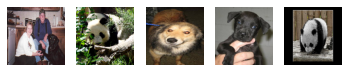

[[0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [ ]:
imgs, labels = train_generator[0]

def plotImages(imgs):
  fig, axes = plt.subplots(1,5)
  axes = axes.flatten()
  for img, ax in zip(imgs, axes):
    ax.imshow(img)
    ax.axis('off')

  plt.show()

plotImages(imgs)
print(labels[:5])

In [ ]:
model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(32,(5,5), activation = 'relu', input_shape = (150, 150, 3)),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Conv2D(32,(5,5), activation = 'relu'),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(32, activation = tf.nn.relu),
                             tf.keras.layers.Dropout(.2)
])
model.add(tf.keras.layers.Dense(3, activation = tf.nn.softmax))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 41472)             0         
                                                                 
 dense_6 (Dense)             (None, 32)               

In [ ]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator,
    epochs = 15,
    steps_per_epoch = train_generator.samples // 32,
    validation_data = valid_generator, 
    validation_steps = valid_generator.samples // 32,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)])

Epoch 1/15
75/75 [==============================] - 19s 247ms/step - loss: 0.9561 - accuracy: 0.4842 - val_loss: 0.8590 - val_accuracy: 0.5729
Epoch 2/15
75/75 [==============================] - 18s 241ms/step - loss: 0.7896 - accuracy: 0.5821 - val_loss: 0.8120 - val_accuracy: 0.5590
Epoch 3/15
75/75 [==============================] - 18s 241ms/step - loss: 0.7179 - accuracy: 0.6121 - val_loss: 0.7704 - val_accuracy: 0.5955
Epoch 4/15
75/75 [==============================] - 18s 239ms/step - loss: 0.6802 - accuracy: 0.6413 - val_loss: 0.7287 - val_accuracy: 0.6094
Epoch 5/15
75/75 [==============================] - 18s 243ms/step - loss: 0.6277 - accuracy: 0.6737 - val_loss: 0.7681 - val_accuracy: 0.6024
Epoch 6/15
75/75 [==============================] - 18s 241ms/step - loss: 0.5505 - accuracy: 0.7321 - val_loss: 0.7866 - val_accuracy: 0.6233
Epoch 7/15
75/75 [==============================] - 18s 243ms/step - loss: 0.4728 - accuracy: 0.7675 - val_loss: 0.8781 - val_accuracy: 0.6458

<function matplotlib.pyplot.show>

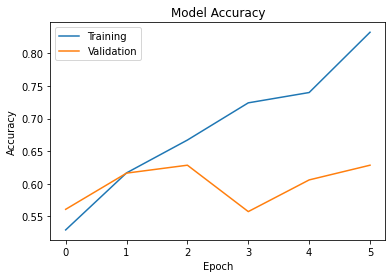

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'])
plt.show

Nota-se overfitting no modelo desde a primeira época.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

Y_pred = model.predict_generator(valid_generator, valid_generator.samples // 32+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(valid_generator.classes, y_pred))
print('Classification Report')
target_names = ['cats', 'dogs', 'panda']
print(classification_report(valid_generator.classes, y_pred, target_names=target_names))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Confusion Matrix
[[31 91 78]
 [37 87 76]
 [35 98 67]]
Classification Report
              precision    recall  f1-score   support

        cats       0.30      0.15      0.20       200
        dogs       0.32      0.43      0.37       200
       panda       0.30      0.34      0.32       200

    accuracy                           0.31       600
   macro avg       0.31      0.31      0.30       600
weighted avg       0.31      0.31      0.30       600



In [ ]:
model.evaluate(test_generator)

19/19 [==============================] - 4s 183ms/step - loss: 0.9935 - accuracy: 0.6250


[0.9935459494590759, 0.625]

Acurácia de teste em 60% condiz com a acurácia de validação do modelo

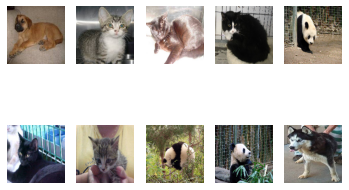

[0 2 2 0 2 1 0 0 0 2]


In [ ]:
imgs, labels = test_generator[0]

def plotImages(imgs):
  fig, axes = plt.subplots(2,5)
  axes = axes.flatten()
  for img, ax in zip(imgs, axes):
    ax.imshow(img)
    ax.axis('off')

  plt.show()

plotImages(imgs)
print(predicted_classes[:10])

In [ ]:
predicted_classes = np.apply_along_axis(np.argmax, 1, model.predict(valid_generator))
incorrect_indices = np.nonzero(predicted_classes != valid_generator.classes)[0]
correct_indices = np.nonzero(predicted_classes == valid_generator.classes)[0]

In [ ]:
correct_indices = np.nonzero(Y_pred == valid_generator.classes)
print(len(correct_indices))

1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


## VGG16

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.models import Model

In [ ]:
 model = VGG16(weights='imagenet', include_top=False)
 model = Model(inputs=model.inputs, outputs=model.layers[-5].output)

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
train_features = model.predict(train_generator)
test_features = model.predict(test_generator)

KeyboardInterrupt: ignored

In [ ]:
from keras.layers import Input, Dense, Conv2D, Activation, MaxPooling2D, Flatten

model2 = VGG16(weights='imagenet', include_top = False)

input_shape = model2.layers[-4].get_input_shape_at(0)
layer_input = Input(shape=(150,150,512))

x = layer_input
for layer in model2.layers[-4::1]:
  x = layer(x)

x = Conv2D(32,(3,3), activation = 'relu')(x)
x = MaxPooling2D(pool_size=(2,2))(x)
x = Flatten()(x)
x = Dense(32, activation='relu')(x)
x = Dense(3, activation='softmax')(x)

new_model = Model(layer_input, x)

In [ ]:
new_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
new_model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 150, 150, 512)]   0         
                                                                 
 block5_conv1 (Conv2D)       multiple                  2359808   
                                                                 
 block5_conv2 (Conv2D)       multiple                  2359808   
                                                                 
 block5_conv3 (Conv2D)       multiple                  2359808   
                                                                 
 block5_pool (MaxPooling2D)  multiple                  0         
                                                                 
 conv2d_16 (Conv2D)          (None, 73, 73, 32)        147488    
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 36, 36, 32)       0   

In [ ]:
history = new_model.fit(train_generator,
    epochs = 10,
    steps_per_epoch = train_generator.samples // 32,
    validation_data = valid_generator, 
    validation_steps = valid_generator.samples // 32)

Epoch 1/10


InvalidArgumentError: ignored

## Resnet50

In [ ]:
base_model = tf.keras.applications.resnet50.ResNet50(
    include_top=False, weights='imagenet',
    input_shape=(150,150,3)
)

In [ ]:
base_model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(32,(5,5), activation = 'relu', input_shape = (150, 150, 3)),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Conv2D(32,(5,5), activation = 'relu'),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(32, activation = tf.nn.relu),
])
base_model.add(tf.keras.layers.Dense(3, activation = tf.nn.softmax))

In [ ]:
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.models import Sequential, Model

def build_finetune_model(base_model, dropout, fc_layers, num_classes):
    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output
    x = Flatten()(x)
    for fc in fc_layers:
        # New FC layer, random init
        x = Dense(fc, activation='relu')(x) 
        x = Dropout(dropout)(x)

    # New softmax layer
    predictions = Dense(3, activation='softmax')(x) 
    
    finetune_model = Model(inputs=base_model.input, outputs=predictions)

    return finetune_model

class_list = ["cats", "dogs", "panda"]
FC_LAYERS = [1024, 1024]
dropout = 0.5

finetune_model = build_finetune_model(base_model, 
                                      dropout=dropout, 
                                      fc_layers=FC_LAYERS, 
                                      num_classes=len(class_list))

In [ ]:
finetune_model.summary()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/10
17/17 [==============================] - 12s 375ms/step - loss: 5.1172 - accuracy: 0.3732 - val_loss: 1.7273 - val_accuracy: 0.4531
Epoch 2/10
17/17 [==============================] - 7s 334ms/step - loss: 1.5951 - accuracy: 0.4136 - val_loss: 0.9304 - val_accuracy: 0.5156
Epoch 3/10
17/17 [==============================] - 7s 336ms/step - loss: 1.1426 - accuracy: 0.3989 - val_loss: 1.0025 - val_accuracy: 0.4844
Epoch 4/10
17/17 [==============================] - 6s 295ms/step - loss: 1.0490 - accuracy: 0.4393 - val_loss: 1.0007 - val_accuracy: 0.5312
Epoch 5/10
17/17 [==============================] - 6s 335ms/step - loss: 0.9703 - accuracy: 0.5092 - val_loss: 0.9696 - val_accuracy: 0.4922
Epoch 6/10
17/17 [==============================] - 7s 332ms/step - loss: 1.0065 - accuracy: 0.4835 - val_loss: 0.9338 - val_accuracy: 0.5234
Epoch 7/10
17/17 [==============================] - 6s 332ms/step - loss: 0.9453 - accuracy: 0.5110 - val_loss: 0.9440 - val_accuracy: 0.5312
Epoch

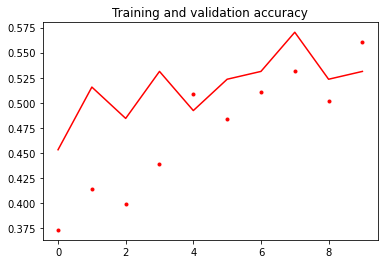

<Figure size 432x288 with 0 Axes>

In [ ]:



NUM_EPOCHS = 10
BATCH_SIZE = 128
num_train_images = 2300


finetune_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# filepath="./checkpoints/" + "ResNet50" + "_model_weights.h5"
# checkpoint = ModelCheckpoint(filepath, monitor=["acc"], verbose=1, mode='max')
# callbacks_list = [checkpoint]

history = finetune_model.fit_generator(train_generator, epochs=NUM_EPOCHS, workers=8, 
                                       steps_per_epoch=num_train_images // BATCH_SIZE, validation_data = valid_generator, validation_steps = valid_generator.samples // BATCH_SIZE,
                                       shuffle=True, )




# Plot the training and validation loss + accuracy
def plot_training(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))

    plt.plot(epochs, acc, 'r.')
    plt.plot(epochs, val_acc, 'r')
    plt.title('Training and validation accuracy')

    # plt.figure()
    # plt.plot(epochs, loss, 'r.')
    # plt.plot(epochs, val_loss, 'r-')
    # plt.title('Training and validation loss')
    plt.show()

    plt.savefig('acc_vs_epochs.png')

plot_training(history)

In [ ]:
finetune_model.evaluate(test_generator)

19/19 [==============================] - 5s 264ms/step - loss: 0.9108 - accuracy: 0.5450


[0.9107537865638733, 0.5450000166893005]

## Inception V3

In [ ]:
from keras import applications
from keras.applications import inception_v3

base_model = applications.InceptionV3(weights='imagenet', include_top=False, input_shape = (150, 150, 3))

# Adding layers which will be fine-tunned
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(3, activation='softmax')(x)

# Creating final model
model = Model(inputs=base_model.input, outputs=predictions)


# Freezing Convolutional layers
for layer in base_model.layers:
    layer.trainable = False

# Summarizing layers
print(model.summary())

# Compiling the CNN
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

AttributeError: ignored